In [1]:
import numpy as np
import os
import sys
import csv
import matplotlib.pyplot as plt
import random
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt(r'C:\Users\tharu\623P\in_put.csv', delimiter = ',')
Y_train = np.loadtxt(r'C:\Users\tharu\623P\la_bels.csv', delimiter = ',')

X_test = np.loadtxt(r'C:\Users\tharu\623P\in_put_test.csv', delimiter = ',')
Y_test = np.loadtxt(r'C:\Users\tharu\623P\la_bels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 640, 480, 1)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 640, 480, 1)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (67, 640, 480, 1)
Shape of Y_train:  (67, 1)
Shape of X_test:  (24, 640, 480, 1)
Shape of Y_test:  (24, 1)


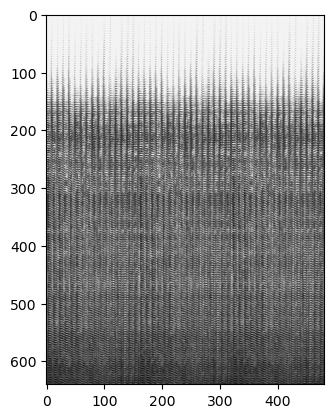

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :, :, 0], cmap='gray')
plt.show()

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(640,480,1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(32, (3,3), activation='relu'),  
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [7]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.fit(X_train, Y_train, epochs = 110, batch_size = 5)

Epoch 1/110
14/14 [==============================] - 4s 288ms/step - loss: 4.3147e-06 - accuracy: 1.0000
Epoch 2/110
14/14 [==============================] - 4s 291ms/step - loss: 4.2800e-06 - accuracy: 1.0000
Epoch 3/110
14/14 [==============================] - 4s 298ms/step - loss: 4.2305e-06 - accuracy: 1.0000
Epoch 4/110
14/14 [==============================] - 4s 321ms/step - loss: 4.1879e-06 - accuracy: 1.0000
Epoch 5/110
14/14 [==============================] - 5s 327ms/step - loss: 4.1494e-06 - accuracy: 1.0000
Epoch 6/110
14/14 [==============================] - 4s 308ms/step - loss: 4.1454e-06 - accuracy: 1.0000
Epoch 7/110
14/14 [==============================] - 4s 311ms/step - loss: 4.0760e-06 - accuracy: 1.0000
Epoch 8/110
14/14 [==============================] - 4s 322ms/step - loss: 4.0324e-06 - accuracy: 1.0000
Epoch 9/110
14/14 [==============================] - 4s 305ms/step - loss: 3.9901e-06 - accuracy: 1.0000
Epoch 10/110
14/14 [==============================] - 4

In [17]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 372ms/step - loss: 4.6436 - accuracy: 0.5417


[4.643640041351318, 0.5416666865348816]

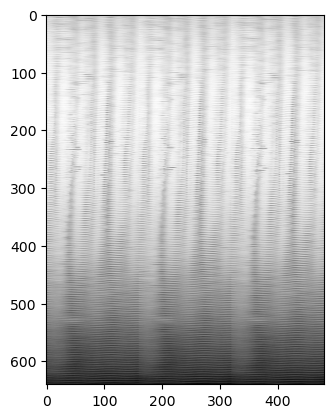

1/1 [==============================] - 0s 124ms/step
0


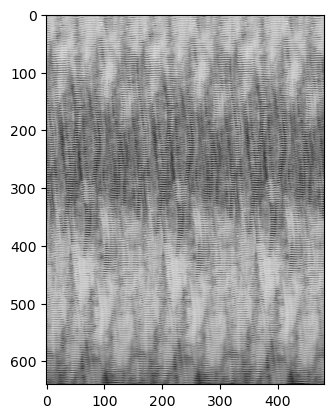

1/1 [==============================] - 0s 34ms/step
0


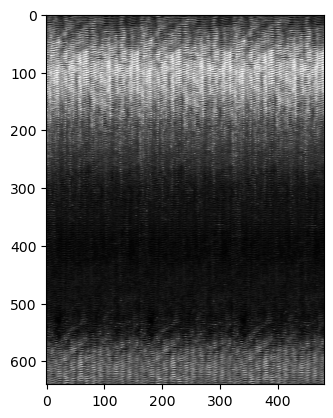

1/1 [==============================] - 0s 29ms/step
0


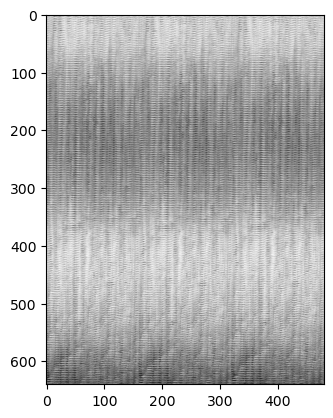

1/1 [==============================] - 0s 24ms/step
0


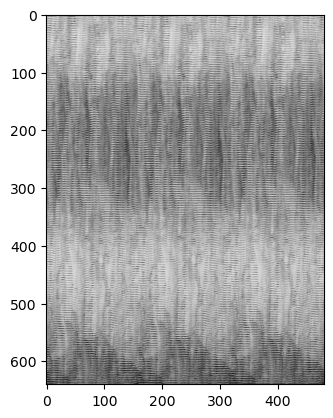

1/1 [==============================] - 0s 45ms/step
0


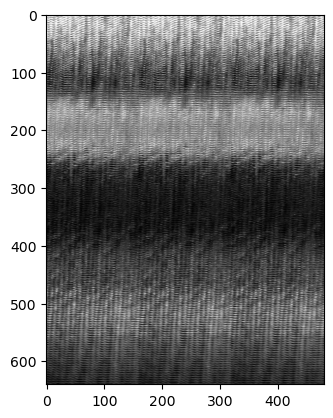

1/1 [==============================] - 0s 24ms/step
0


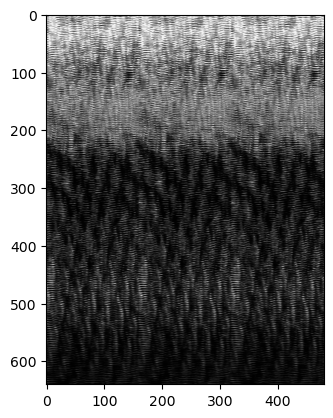

1/1 [==============================] - 0s 26ms/step
0


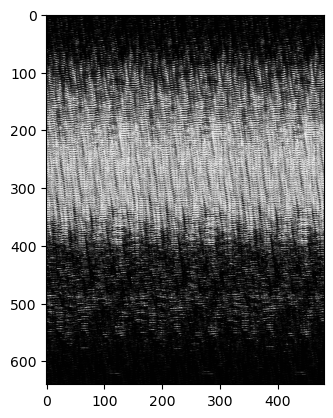

1/1 [==============================] - 0s 53ms/step
1


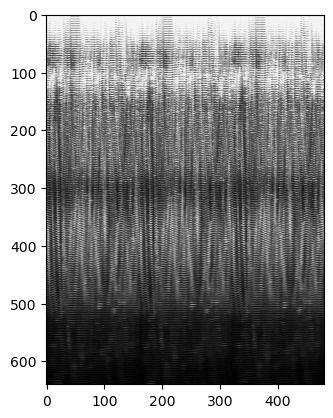

1/1 [==============================] - 0s 29ms/step
1


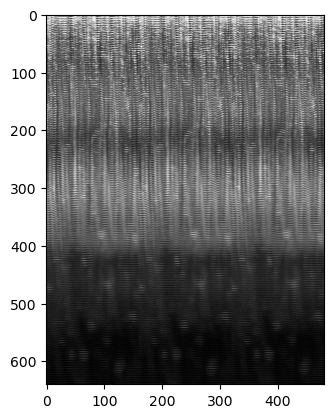

1/1 [==============================] - 0s 22ms/step
0


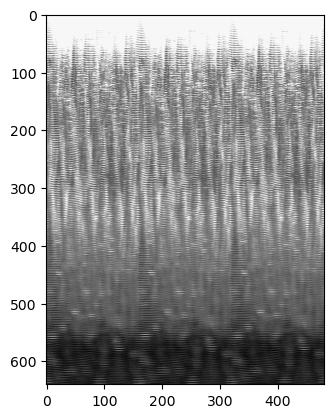

1/1 [==============================] - 0s 29ms/step
1


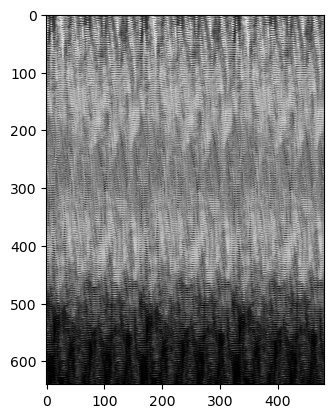

1/1 [==============================] - 0s 27ms/step
0


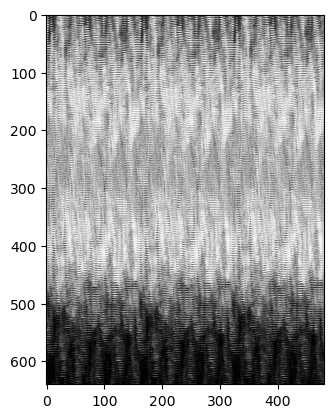

1/1 [==============================] - 0s 38ms/step
0


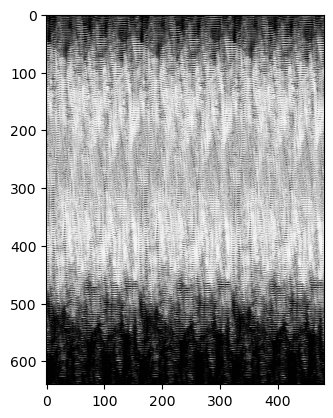

1/1 [==============================] - 0s 34ms/step
0


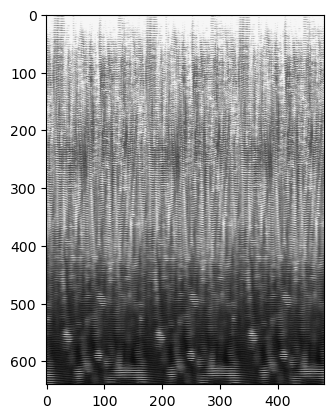

1/1 [==============================] - 0s 34ms/step
1


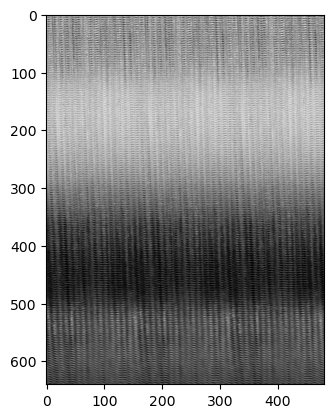

1/1 [==============================] - 0s 50ms/step
0


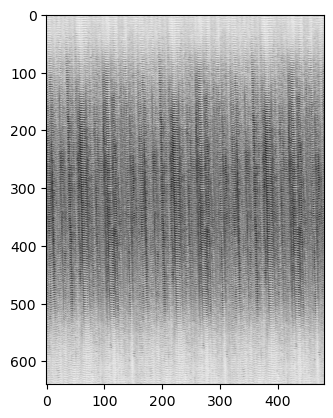

1/1 [==============================] - 0s 32ms/step
1


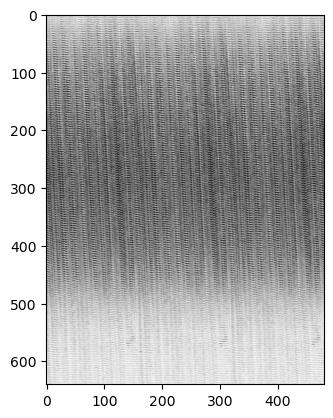

1/1 [==============================] - 0s 34ms/step
0


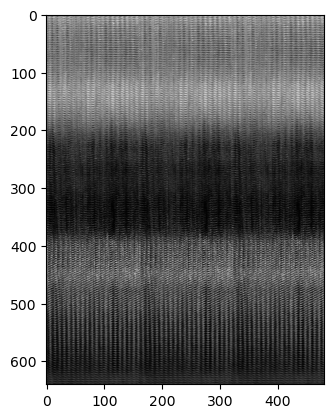

1/1 [==============================] - 0s 37ms/step
0


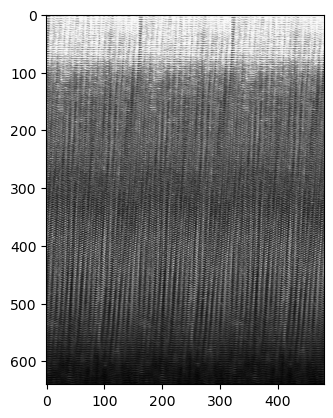

1/1 [==============================] - 0s 49ms/step
0


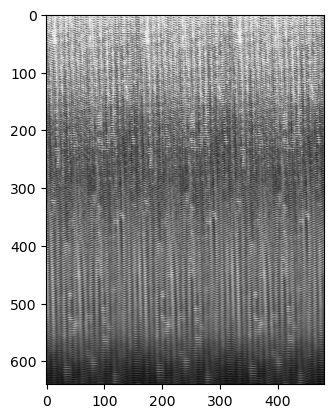

1/1 [==============================] - 0s 29ms/step
0


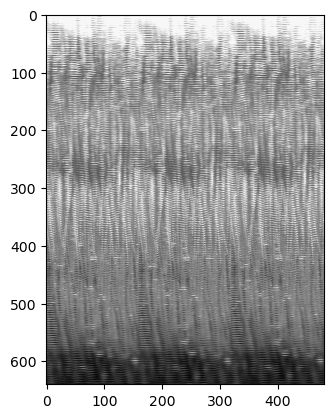

1/1 [==============================] - 0s 34ms/step
0


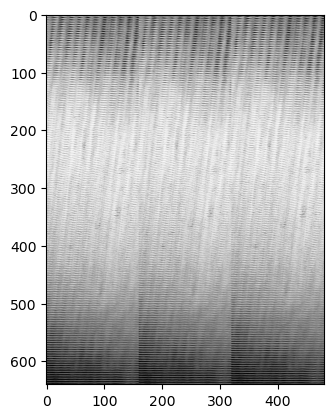

1/1 [==============================] - 0s 38ms/step
0


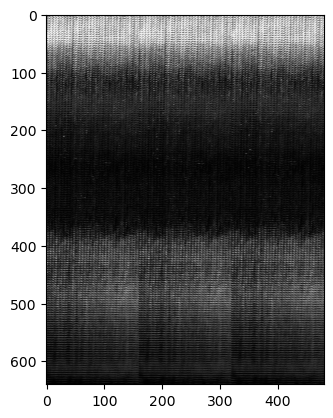

1/1 [==============================] - 0s 46ms/step
0


In [14]:
import matplotlib.pyplot as plt

# Loop through all test samples
for idx2 in range(len(Y_test)):
    # Plot the image
    plt.imshow(X_test[idx2, :, :, 0], cmap='gray')
    plt.show()

    # Predict on the current test sample
    y_pred = model.predict(X_test[idx2, :].reshape(1, 640, 480, 1))
    
    # Apply thresholding
    if y_pred > 0.5:
        y_pred = 1
    else:
        y_pred = 0

    print(y_pred)


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Actual values
actual = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

# Predicted values
predicted = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0]

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual, predicted)

# Calculate evaluation metrics
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted)
recall = recall_score(actual, predicted)
f1 = f1_score(actual, predicted)

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Confusion Matrix:
[[10  2]
 [ 7  5]]

Evaluation Metrics:
Accuracy: 0.62
Precision: 0.71
Recall: 0.42
F1-score: 0.53
